In [54]:
import pandas as pd

In [55]:
from quoptuna import Optimizer
from quoptuna.backend.data_processing.prepare import DataPreparation


In [56]:
db_name = "corral"
study_name ="corral"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [57]:
optimizer.storage_location

'sqlite:///db/corral.db'

In [58]:
optimizer.load_study()
study = optimizer.study

In [59]:
best_trial = study.best_trials

In [60]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} " f"{trial.params.get('model_type')} " f"F1-Score {f1_score}"

In [61]:
for trial in best_trial:
    print(format_trial(trial))

Trial 2 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 4 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 10 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 11 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 18 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 19 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 20 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 21 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 22 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 23 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 27 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 31 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 34 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 35 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 41 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 42 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 43 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 44 ProjectedQuantumKernel F1-Score 1.0
Trial 47 DressedQuantumCircuit

In [62]:
model_params = best_trial[-1].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.01,
 'n_input_copies': 2,
 'n_layers': 5,
 'observable_type': 'full',
 'repeats': 5,
 'C': 0.1,
 'gamma_factor': 10,
 'trotter_steps': 1,
 't': 0.01,
 'n_qfeatures': 'full',
 'n_episodes': 100,
 'visible_qubits': 'single',
 'temperature': 10,
 'encoding_layers': 1,
 'degree': 4,
 'n_qchannels': 5,
 'qkernel_shape': 2,
 'kernel_shape': 3,
 'filter_name': 'edge_detect',
 'gamma': 0.01,
 'alpha': 0.0001,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 0.1,
 'model_type': 'DressedQuantumCircuitClassifier'}

In [63]:
import os
os.listdir()

['test_analcatdata_creditscore.ipynb',
 'test_shap.ipynb',
 '.DS_Store',
 'test_corral.ipynb',
 'test.py',
 'db copy',
 'logs',
 'test_matminer.ipynb',
 'db',
 'optimize_log.txt',
 'data',
 'test_credit_a.ipynb',
 'test_plmb.ipynb']

In [64]:
file_path ="data/corral.csv"
data = pd.read_csv(file_path)
data_prep = DataPreparation(file_path=file_path,
                            x_cols=list(data.columns.difference(["target"])),
                            y_col="target")

x, y = data_prep.select_columns()
x_train, x_test, y_train, y_test = data_prep.prepare_data()
data_dict = {
    "train_x": x_train,
    "test_x": x_test,
    "train_y": y_train,
    "test_y": y_test,
}

In [65]:
from quoptuna.backend.models import create_model
model = create_model(
    **model_params,
)

In [66]:
model.fit(data_dict.get("train_x"), data_dict.get("train_y"))

/Users/edwinjose/Documents/GitHub/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwinjose/Documents/GitHub/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
INFO:root:Model DressedQuantumCircuitClassifier converged after 30598 steps.


DressedQuantumCircuitClassifier(learning_rate=0.01, max_vmap=1, n_layers=5)

In [67]:
from quoptuna.backend.xai import XAI

In [68]:
data_dict_xai={"x_train": pd.DataFrame(data_dict.get("train_x")),
               "y_train": pd.DataFrame(data_dict.get("train_y")),
               "x_test": pd.DataFrame(data_dict.get("test_x")),
               "y_test": pd.DataFrame(data_dict.get("test_y"))}
xai = XAI(model=model, data=data_dict_xai)

ExactExplainer explainer: 101it [01:00,  1.38it/s]                         


In [69]:
xai.get_bar_plot()

KeyError: 0

,0,1,2,3,4,5
0,1.0,1.0,-1.0,1.0,1.078036,-1.0
1,1.0,-1.0,1.0,-1.0,-0.927613,1.0
2,1.0,-1.0,-1.0,1.0,-0.927613,-1.0
3,-1.0,-1.0,-1.0,-1.0,-0.927613,-1.0
4,1.0,1.0,-1.0,-1.0,-0.927613,1.0
...,...,...,...,...,...,...
115,-1.0,-1.0,1.0,1.0,1.078036,1.0
116,-1.0,-1.0,1.0,-1.0,-0.927613,1.0
117,-1.0,1.0,1.0,1.0,-0.927613,-1.0
118,1.0,1.0,1.0,-1.0,1.078036,-1.0


AttributeError: 'int' object has no attribute 'split'

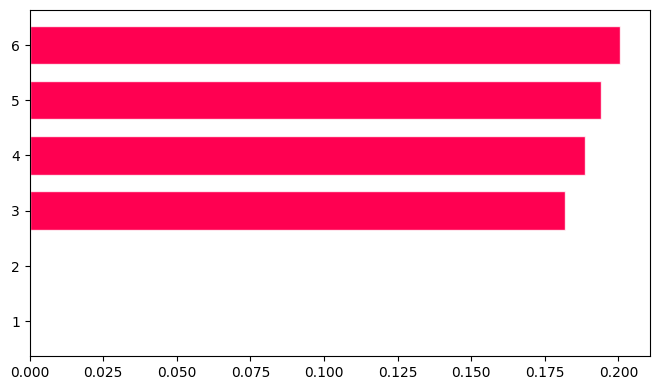

In [48]:
xai.custom_shap_bar_plot(xai.shap_values_each_class[next(iter(model.classes_))],max_display=20)

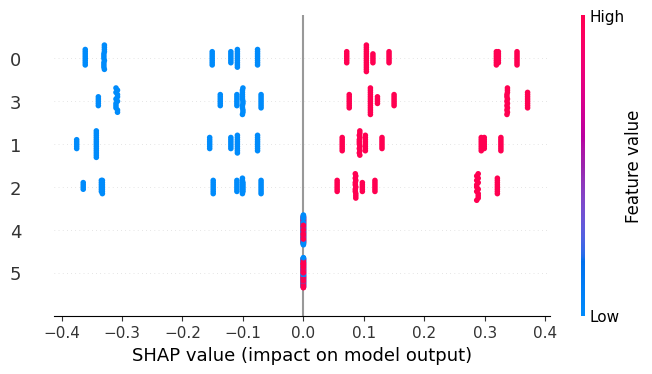

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [51]:
xai.custom_shap_beeswarm_plot(xai.shap_values_each_class[next(iter(model.classes_))],max_display=100)

In [52]:
xai.get_beeswarm_plot()

KeyError: 0

In [53]:
xai.classes

{0: -1, 1: 1}